In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
font = {'family' : 'monospace',
        'size'   : 20}

matplotlib.rc('font', **font)
#matplotlib.rc('text', usetex=True)

#matplotlib.rcParams["text.latex.preamble"].append(r'\usepackage[dvips]{graphicx}\usepackage{xfrac}')

In [4]:
def parse_log(filename, tau):
    LR_values = [[] for i in xrange(50)]
    L_values = [[] for i in xrange(50)]
    R_values = [[] for i in xrange(50)]
    minPhi_values = [[] for i in xrange(50)]
    minTheta_values = [[] for i in xrange(50)]
    RMstepDiff = [[] for i in xrange(50)]
    LogRMstepDiffPerL2 = [[] for i in xrange(50)]
    RMstepDiffPerL2 = [[] for i in xrange(50)]
    RMstepDiffPerL1 = [[] for i in xrange(50)]
    MinTopicSize = [[] for i in xrange(50)]
    NonzeroTopics = [[] for i in xrange(50)]
    
    
    with open(filename, 'r') as fi:
        for line in fi.xreadlines():
            tokens = line.strip().split(' ')
            if tokens[0] == 'launch':
                curr_launch = int(tokens[1])
            if tokens[0] == 'iteration':
                curr_iter = int(tokens[1])
            if tokens[0] == 'Lvalue':
                L_values[curr_iter].append(float(tokens[1]))
            if tokens[0] == 'LRvalue':
                LR_values[curr_iter].append(float(tokens[1]))
            if tokens[0] == 'Rvalue':
                R_values[curr_iter].append(- tau * float(tokens[1]))
            if tokens[0] == 'MinPhiValue':
                minPhi_values[curr_iter].append(np.log(float(tokens[1])) / np.log(10.))
            if tokens[0] == 'MinThetaValue':
                minTheta_values[curr_iter].append(np.log(float(tokens[1])) / np.log(10.))
            if tokens[0] == 'RMstepDiff':
                RMstepDiff[curr_iter].append(- tau * float(tokens[1]))
            if tokens[0] == 'RMstepDiffPerL1':
                RMstepDiffPerL1[curr_iter].append(- tau * float(tokens[1]))
            if tokens[0] == 'RMstepDiffPerL2':
                RMstepDiffPerL2[curr_iter].append(- tau * float(tokens[1]))
                LogRMstepDiffPerL2[curr_iter].append(np.log(abs(float(tokens[1]))))
            if tokens[0] == 'TopicSizes':
                topics = map(float, tokens[1:])
                MinTopicSize[curr_iter].append(min(topics))
                NonzeroTopics[curr_iter].append(len([x for x in topics if x > 1000]))
                
    return {
        'LR_values': LR_values,
        'L_values': L_values,
        'R_values': R_values,
        'minPhi_values': minPhi_values,
        'minTheta_values': minTheta_values,
        'RMstepDiff': RMstepDiff,
        'RMstepDiffPerL1': RMstepDiffPerL1,
        'RMstepDiffPerL2': RMstepDiffPerL2,
        'MinTopicSize': MinTopicSize,
        'NonzeroTopics': NonzeroTopics,
        'LogRMstepDiffPerL2': LogRMstepDiffPerL2
    }


In [5]:
import numpy as np

In [6]:
TEMPLATE = 'E:/diploma_logs/topics_{topics}/{ttype}_topics_{topics}_reg_tau_{tau}.000000.log'
TYPES = ['original', 'unbiased', 'gradient_x1', 'gradient_x50']
LEGEND = ['original', 'unbiased', 'naive gradient', 'long gradient']
COLORS = ['blue', 'green', 'red', 'cyan']
TAUS = [100000, 1000000, 10000000, 100000000]

In [7]:
def plot(topics, name, legeng_loc, x_axis, y_axis, start_pos=1, zero_line=False):
    fig = plt.figure(figsize=(18, 10))
    for i, tau in enumerate(TAUS):
        plt.subplot(2, 2, i + 1)
        plt.title('$\\tau = 10^{' + str(int(round(np.log(tau) / np.log(10)))) + '}$')
        #plt.title('tau = ' + str(tau))
        lines = []
        for color, ttype in zip(COLORS, TYPES):
            values = [np.mean(x) for x in parse_log(TEMPLATE.format(topics=topics, tau=tau, ttype=ttype), tau)[name]]
            #values2 = [np.mean(x) - (np.std(x)) for x in parse_log(TEMPLATE.format(topics=topics, tau=tau, ttype=ttype), tau)[name]]
            lines.extend(plt.plot(range(start_pos, 50), values[start_pos:], color=color))
            #plt.plot(range(start_pos, 50), values2[start_pos:], color=color)
            #plt.legend(LEGEND, loc=legeng_loc)
            plt.xlabel(x_axis)
            plt.ylabel(y_axis)
        if zero_line:
            plt.axhline(0, color='black')
            
    plt.tight_layout()
    plt.subplots_adjust(bottom=.16)
    lgd = plt.figlegend(lines, LEGEND, loc='lower center', ncol=4)
    
    plt.savefig('E:/topics_' + str(topics) + '_' + str(name) + '.eps', format='eps', additional_artists=[lgd], bbox_inches="tight")
    plt.show()

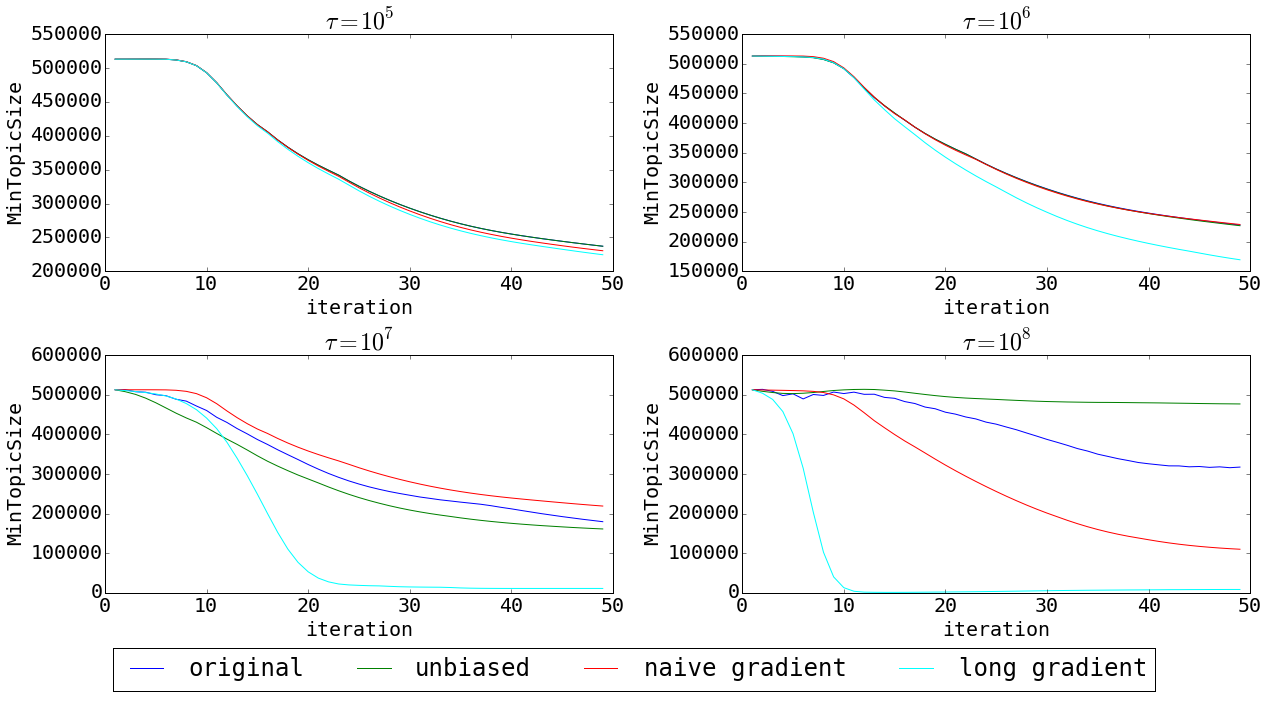

In [79]:
plot(10, 'MinTopicSize', 'lower left', 'iteration', 'MinTopicSize')

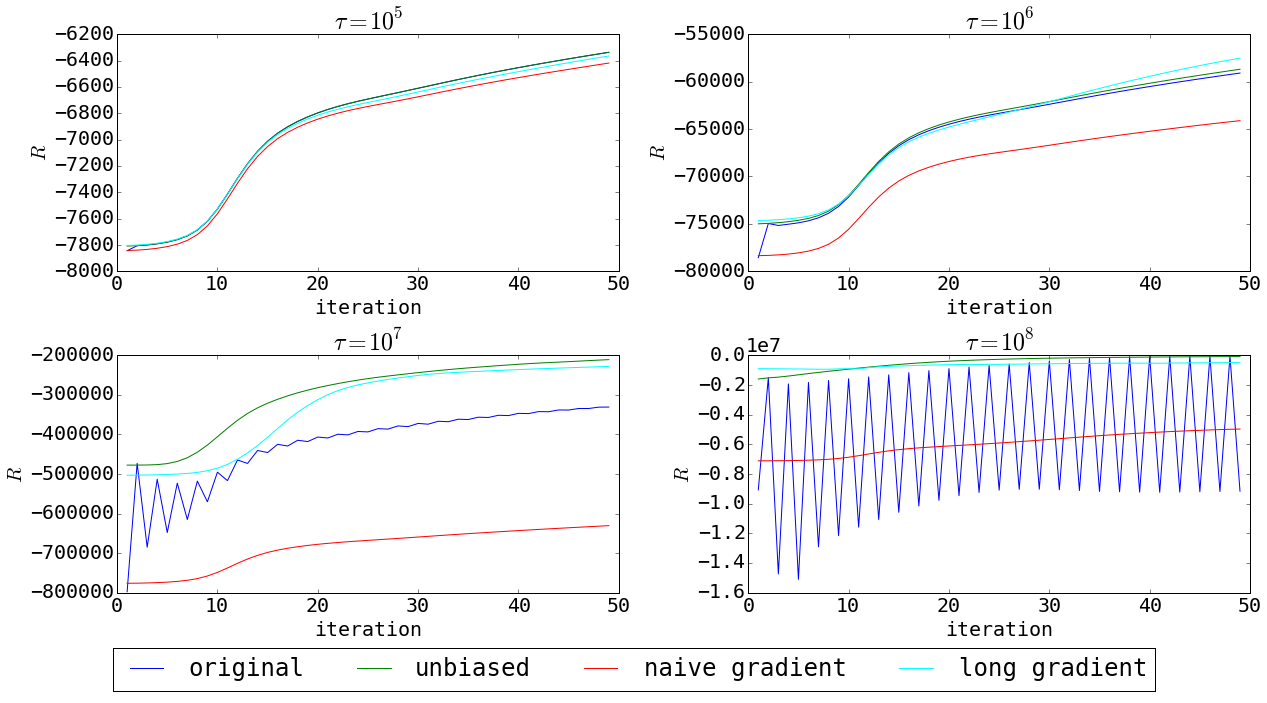

In [80]:
plot(10, 'R_values', 'lower right', 'iteration', '$R$')

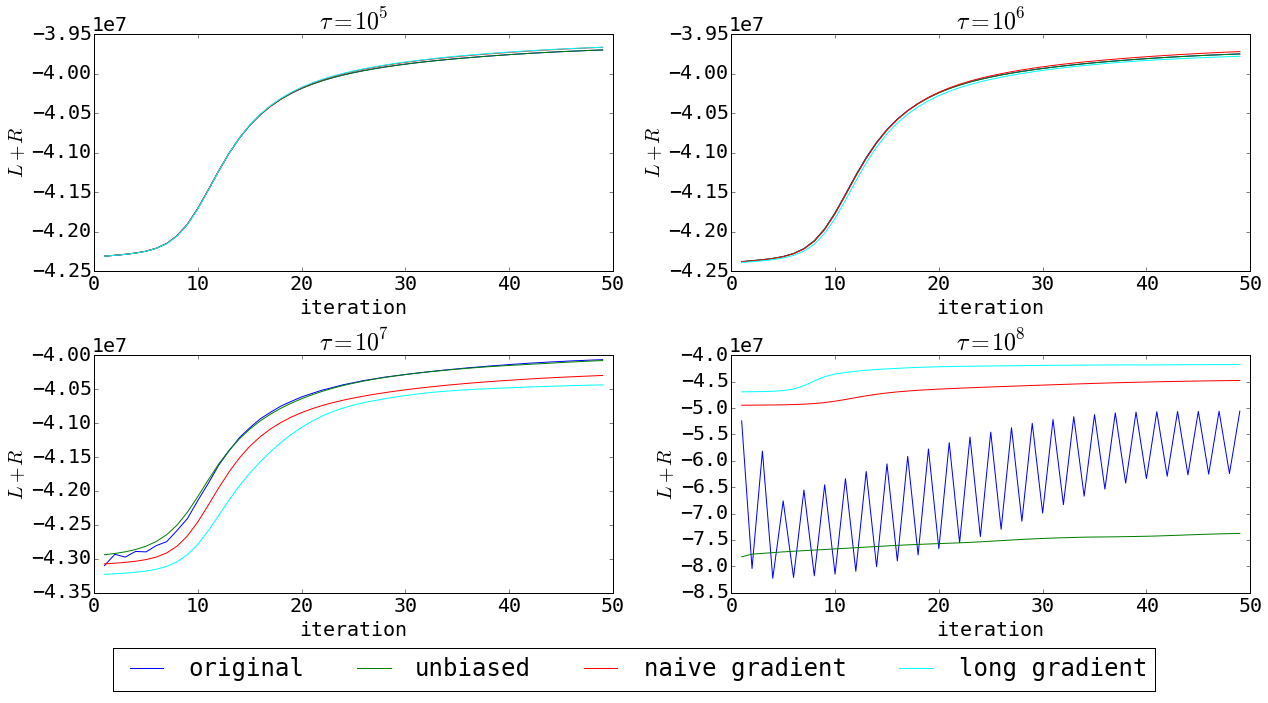

In [81]:
plot(10, 'LR_values', 'lower right', 'iteration', '$L + R$')

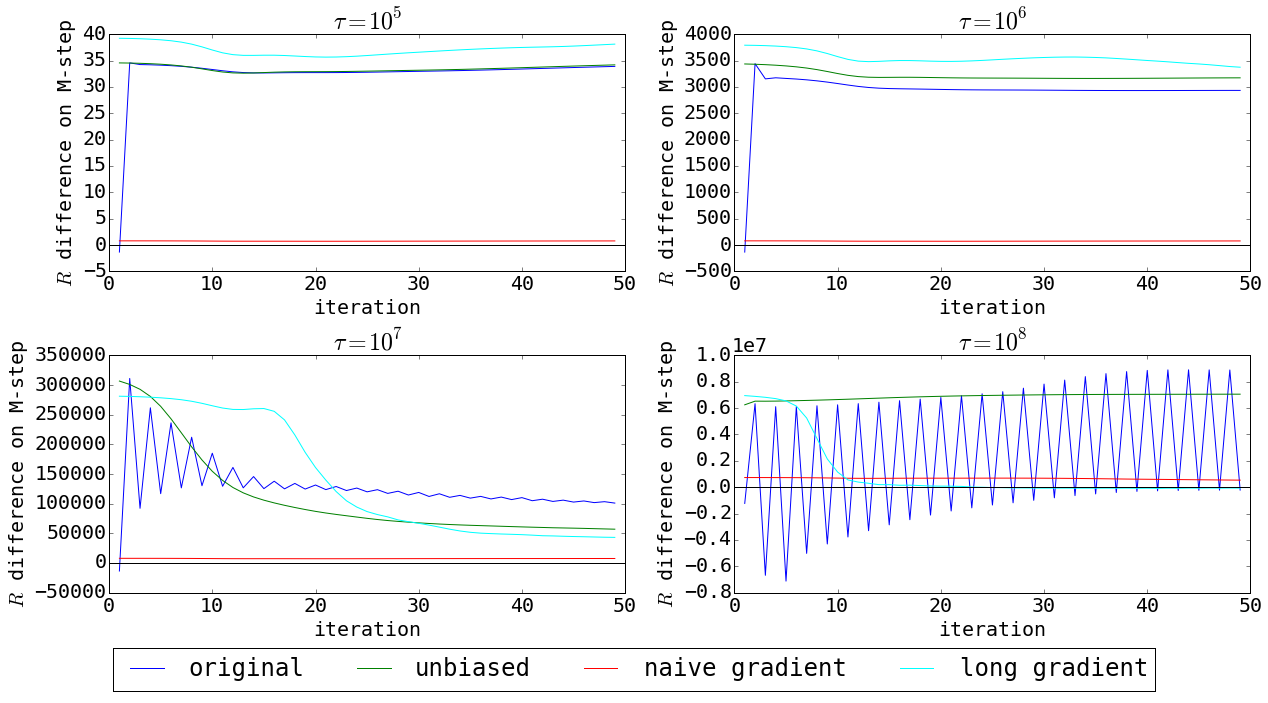

In [82]:
plot(10, 'RMstepDiff', 'upper right', 'iteration', '$R$ difference on M-step', zero_line=True)

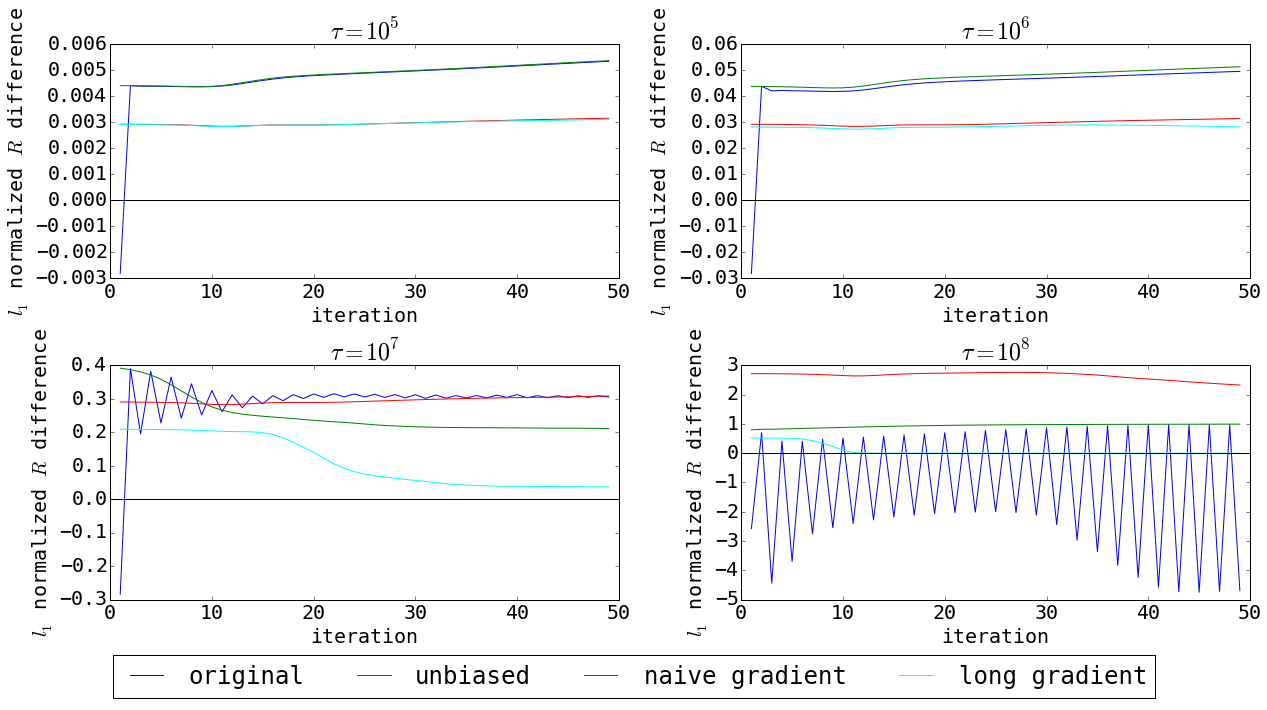

In [83]:
plot(10, 'RMstepDiffPerL1', 'best', 'iteration', '$l_1$ normalized $R$ difference', zero_line=True)

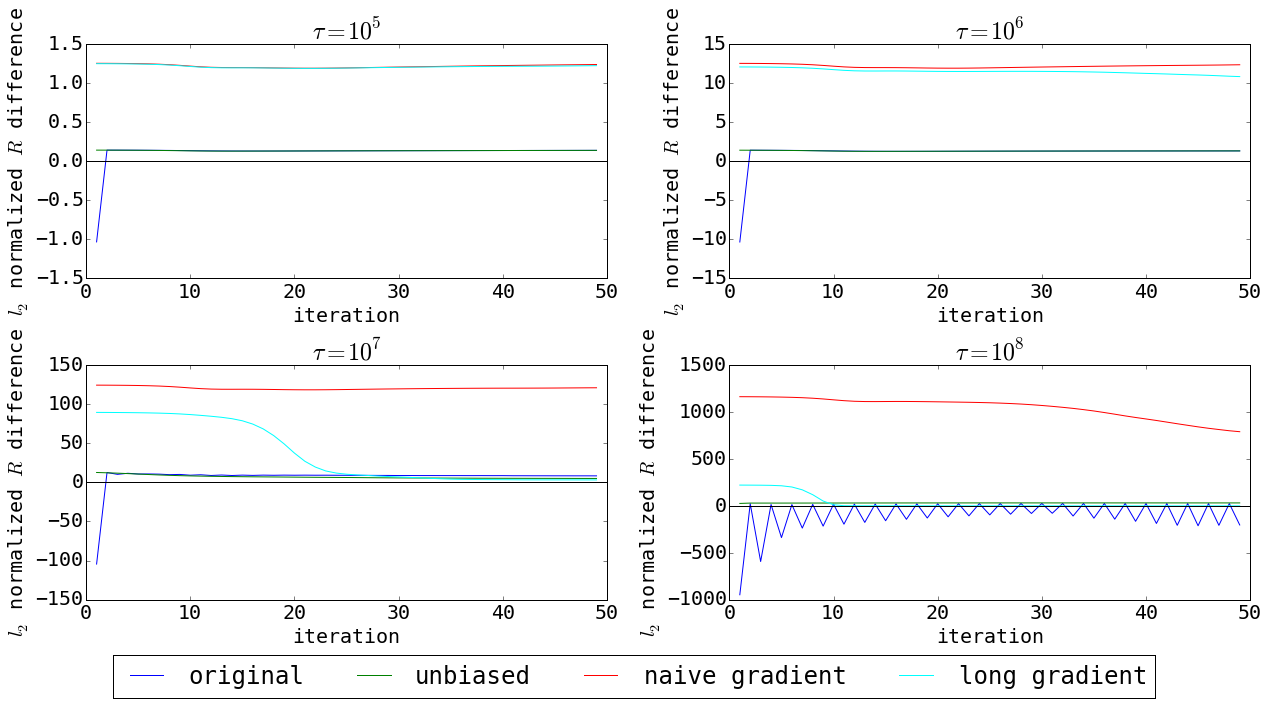

In [84]:
plot(10, 'RMstepDiffPerL2', 'best', 'iteration', '$l_2$ normalized $R$ difference', zero_line=True)

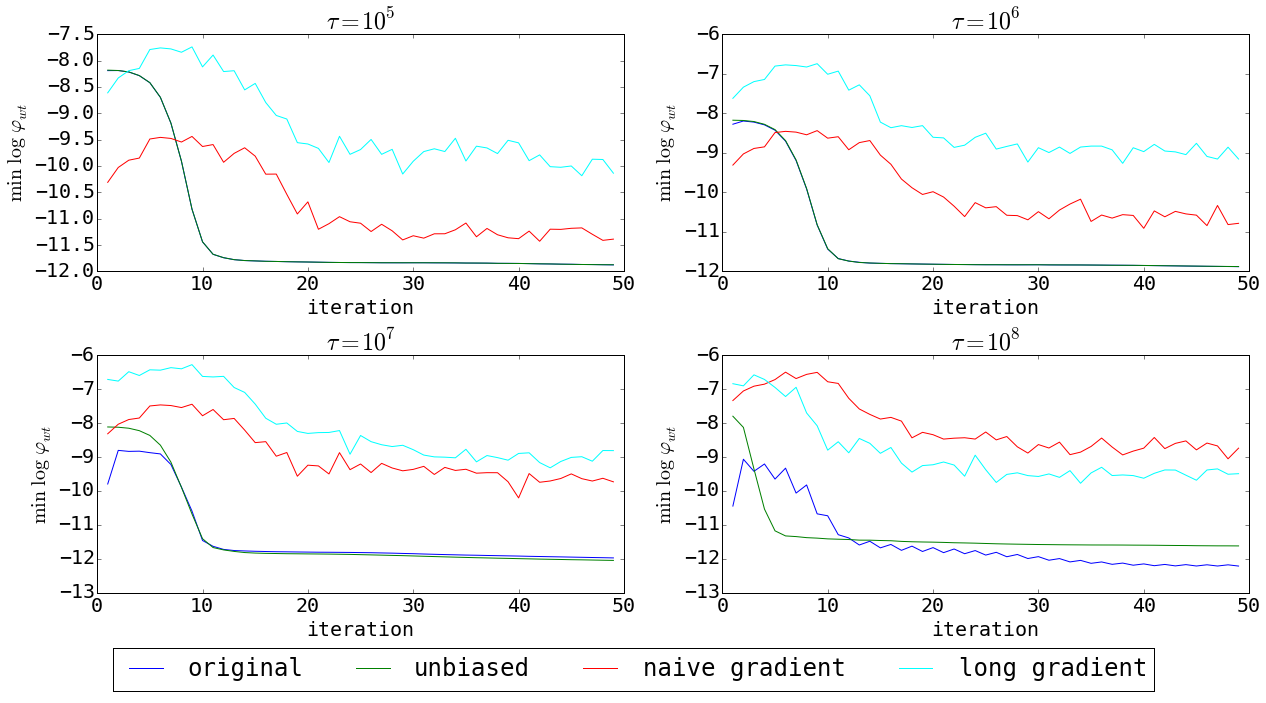

In [85]:
plot(10, 'minPhi_values', 'upper right', 'iteration', '$\\min\\ \\log\\ \\varphi_{wt}$')

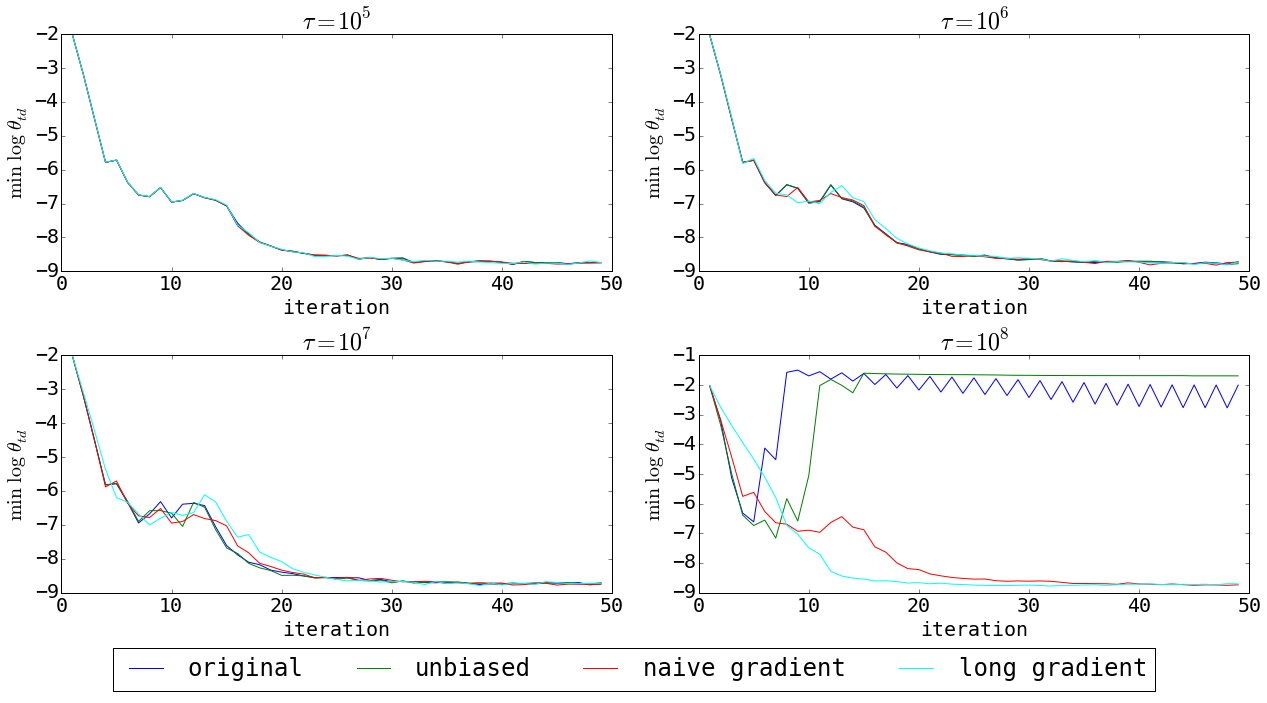

In [86]:
plot(10, 'minTheta_values', 'upper right', 'iteration', '$\\min\\ \\log\\ \\theta_{td}$')

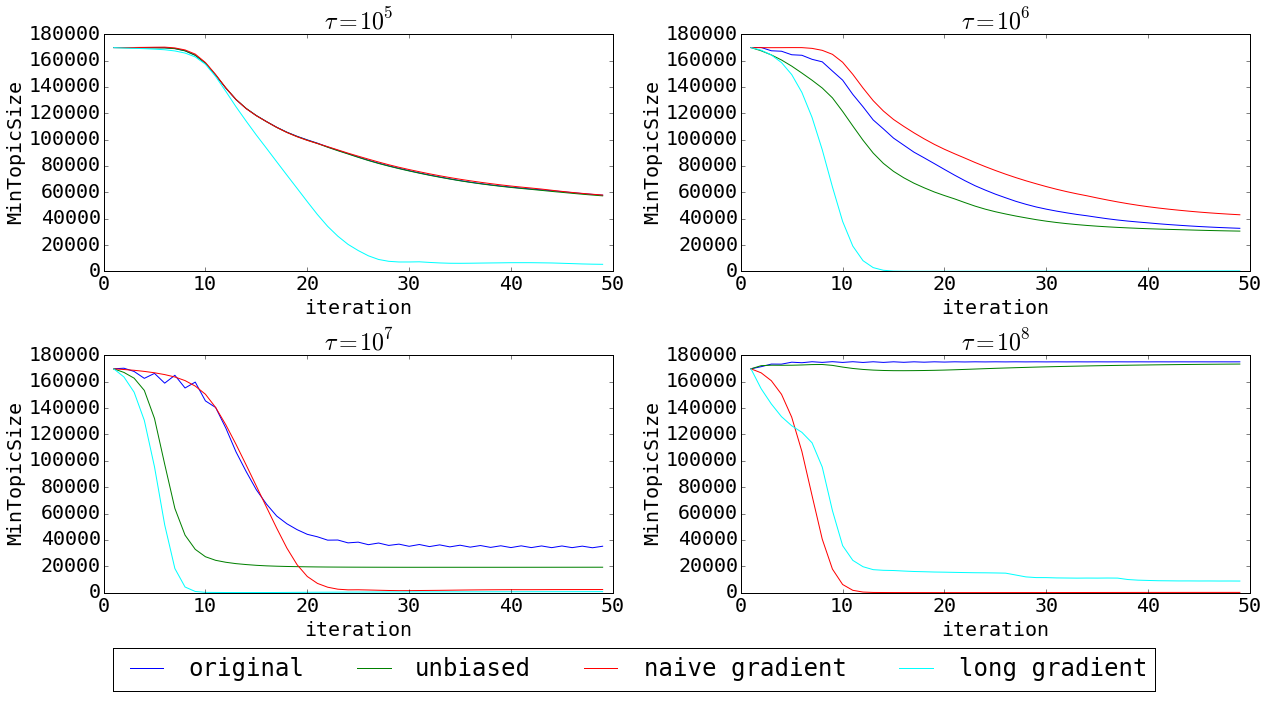

In [87]:
plot(30, 'MinTopicSize', 'upper right', 'iteration', 'MinTopicSize')

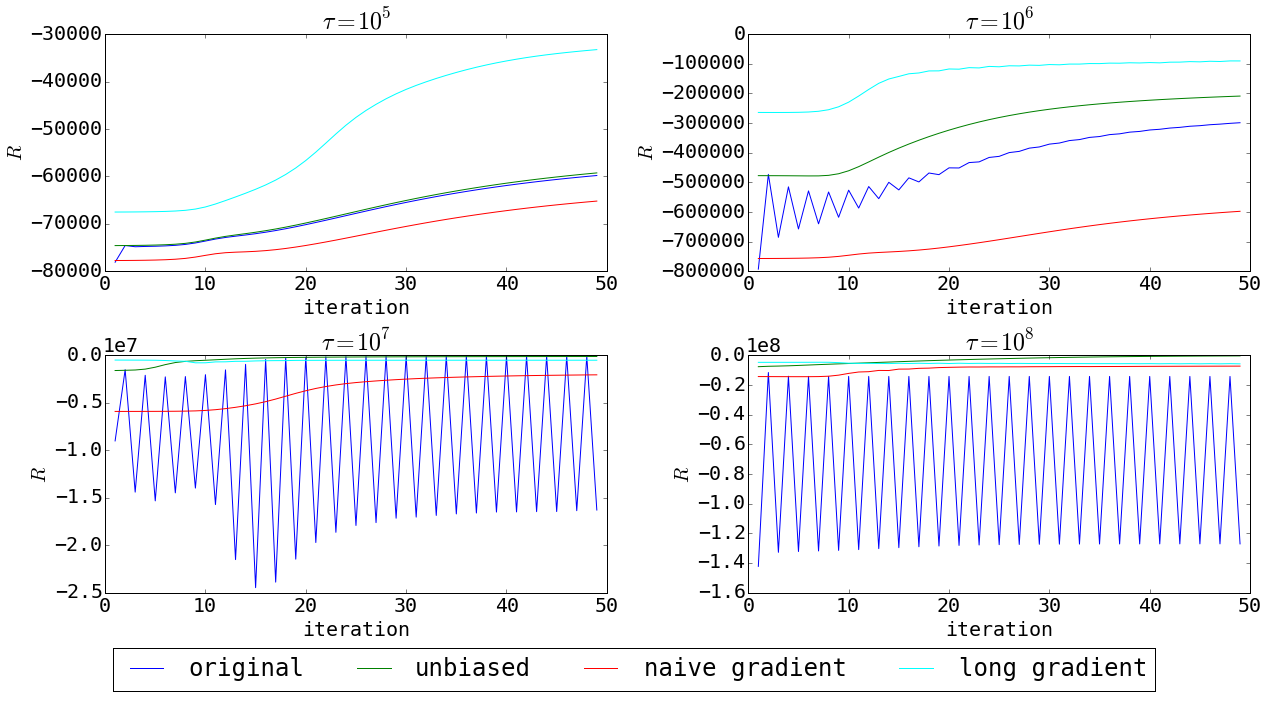

In [88]:
plot(30, 'R_values', 'lower right', 'iteration', '$R$')

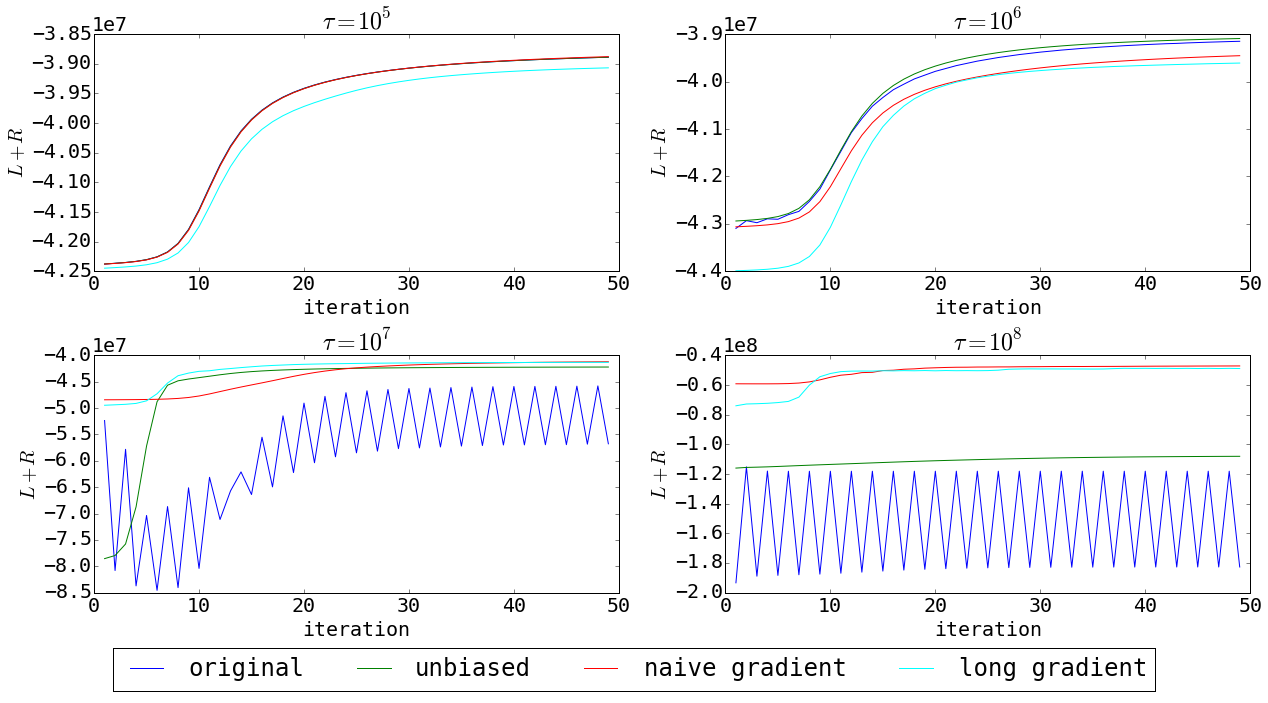

In [89]:
plot(30, 'LR_values', 'lower right', 'iteration', '$L + R$')

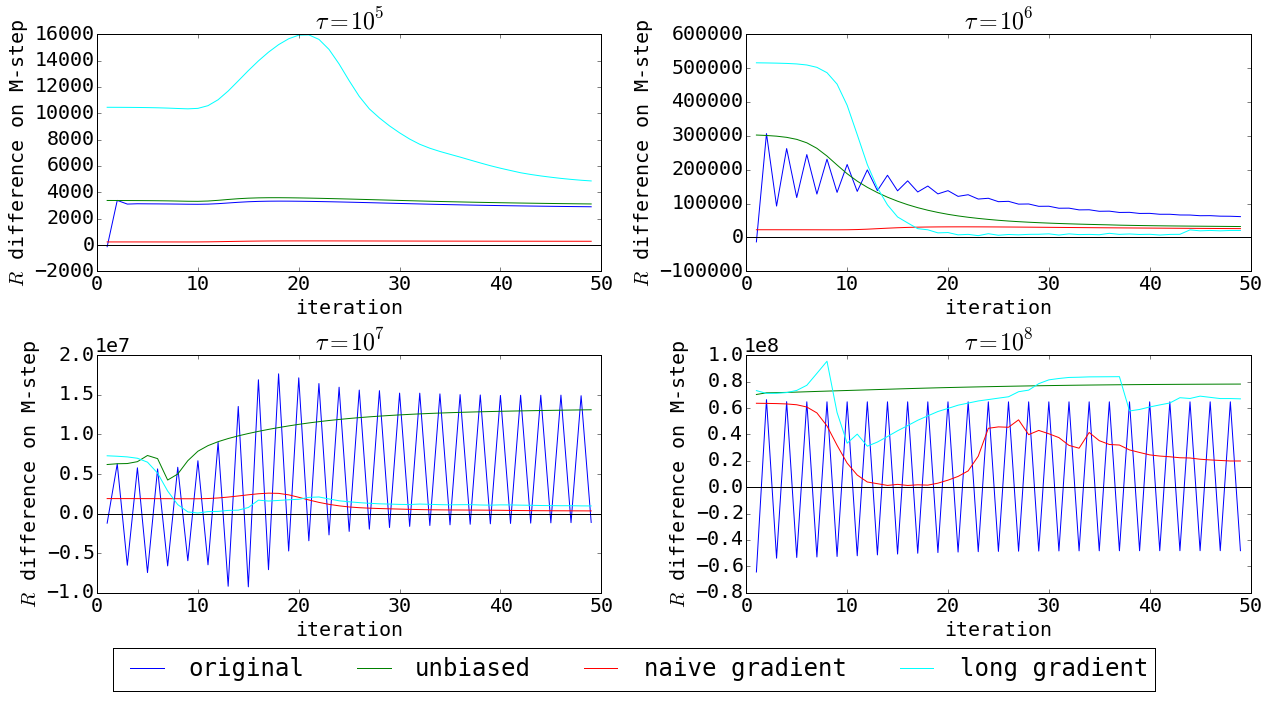

In [90]:
plot(30, 'RMstepDiff', 'upper right', 'iteration', '$R$ difference on M-step', zero_line=True)

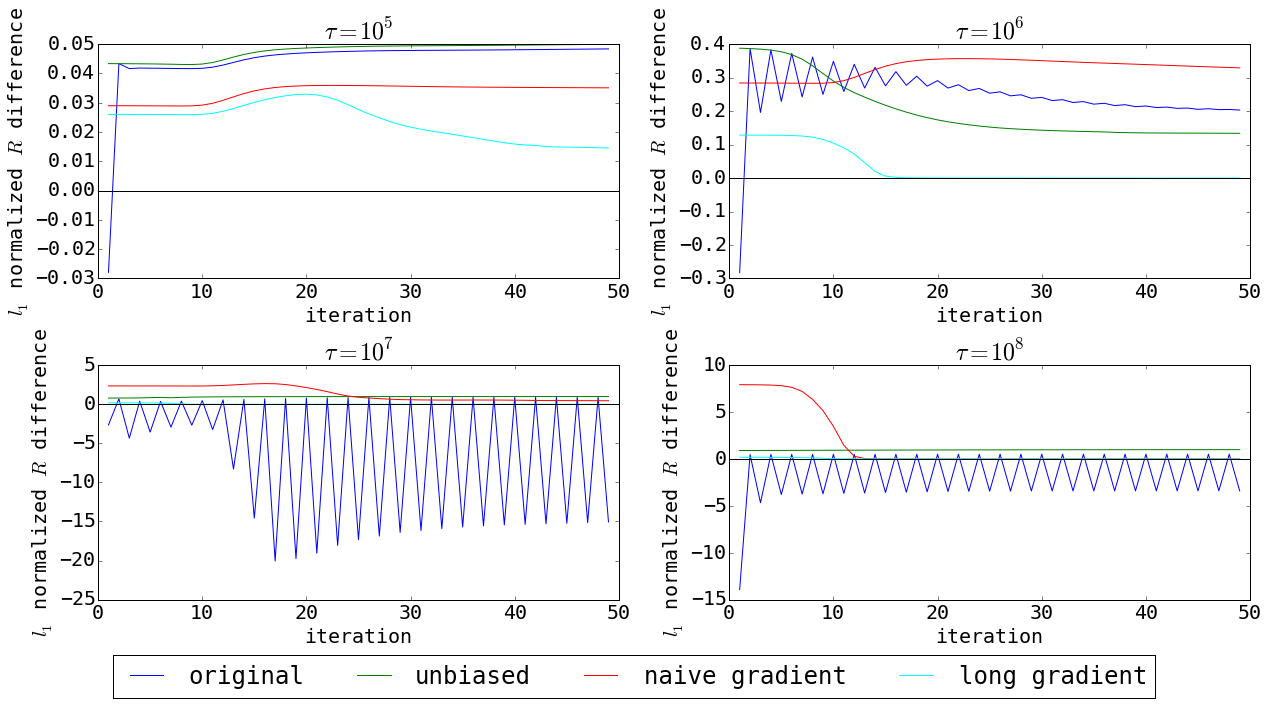

In [91]:
plot(30, 'RMstepDiffPerL1', 'best', 'iteration', '$l_1$ normalized $R$ difference', zero_line=True)

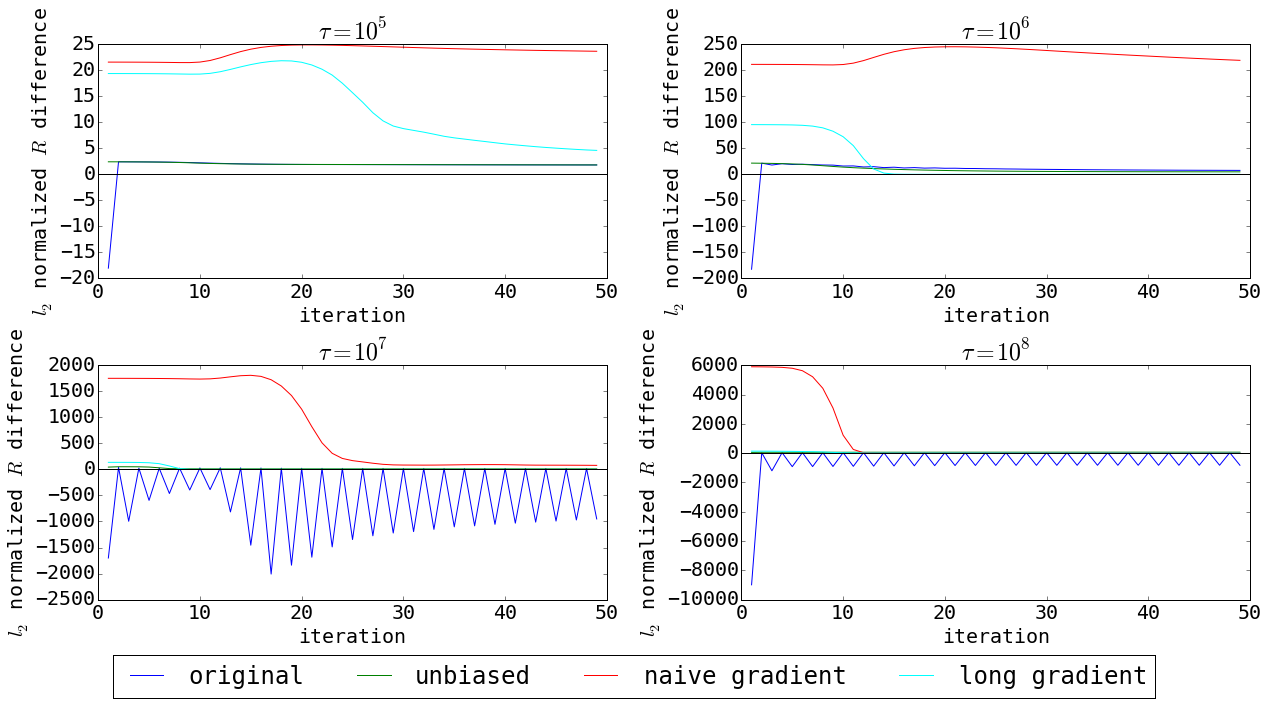

In [92]:
plot(30, 'RMstepDiffPerL2', 'best', 'iteration', '$l_2$ normalized $R$ difference', zero_line=True)

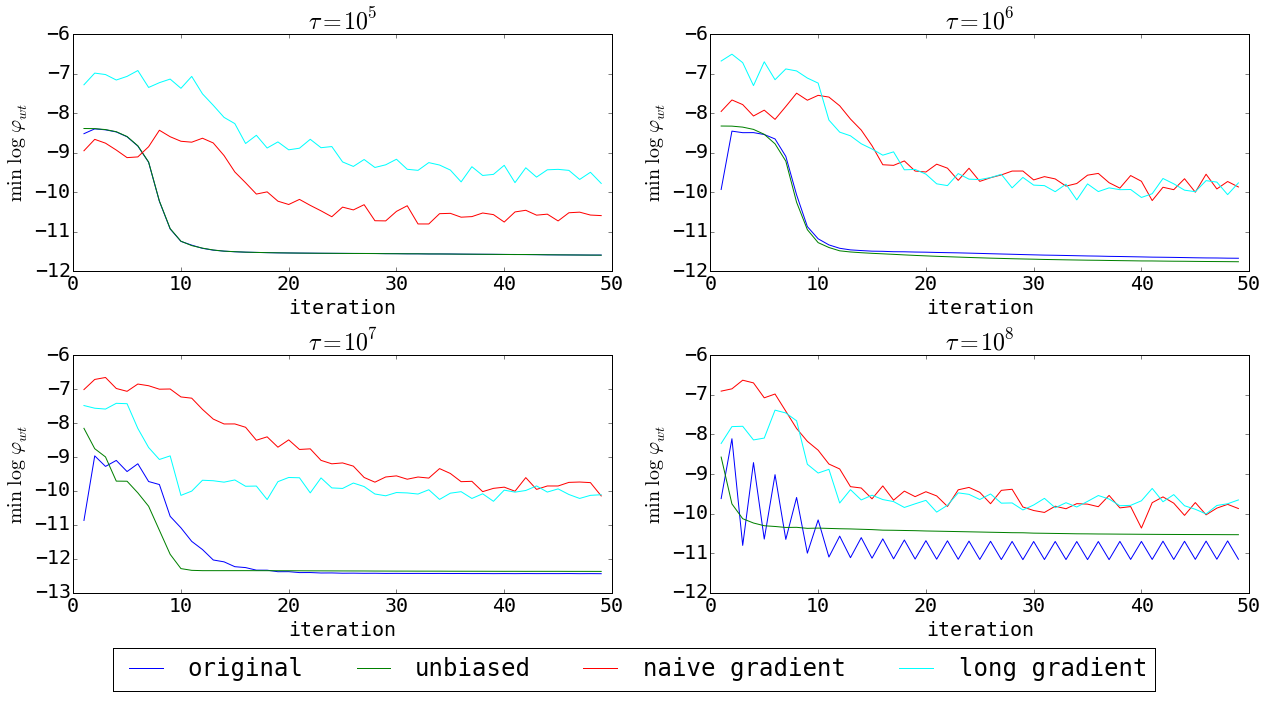

In [93]:
plot(30, 'minPhi_values', 'upper right', 'iteration', '$\\min\\ \\log\\ \\varphi_{wt}$')

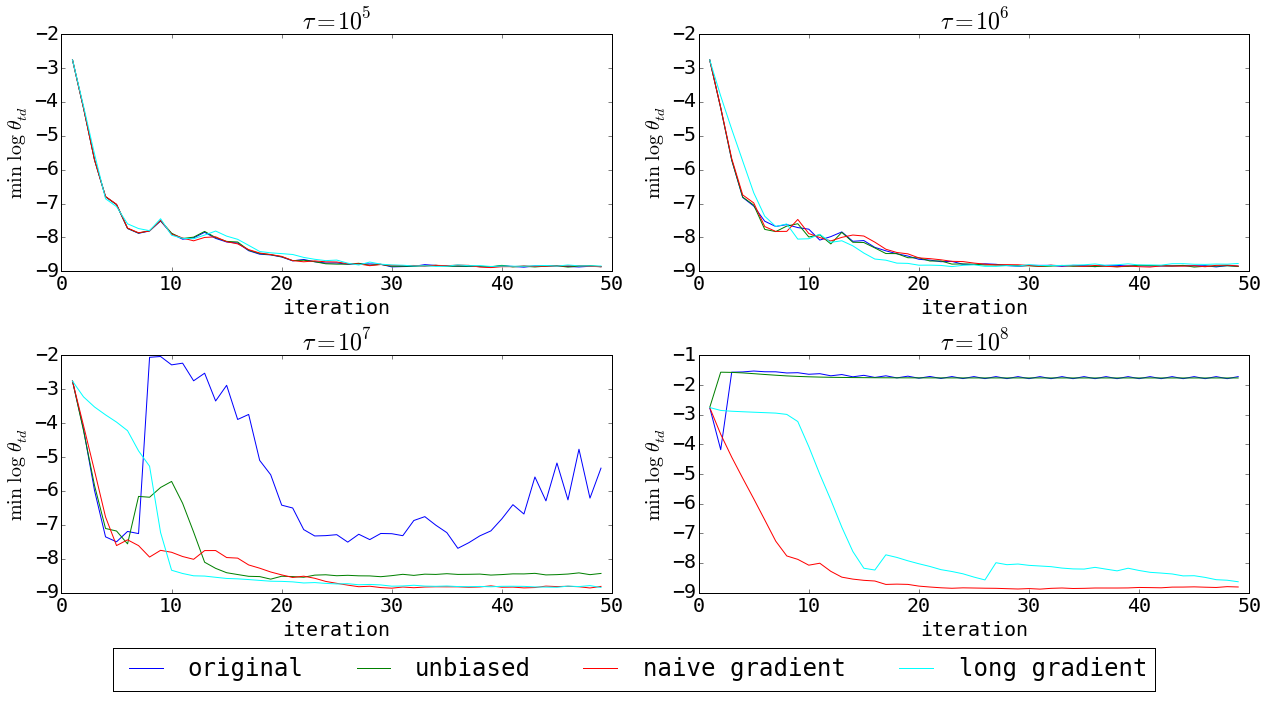

In [94]:
plot(30, 'minTheta_values', 'upper right', 'iteration', '$\\min\\ \\log\\ \\theta_{td}$')

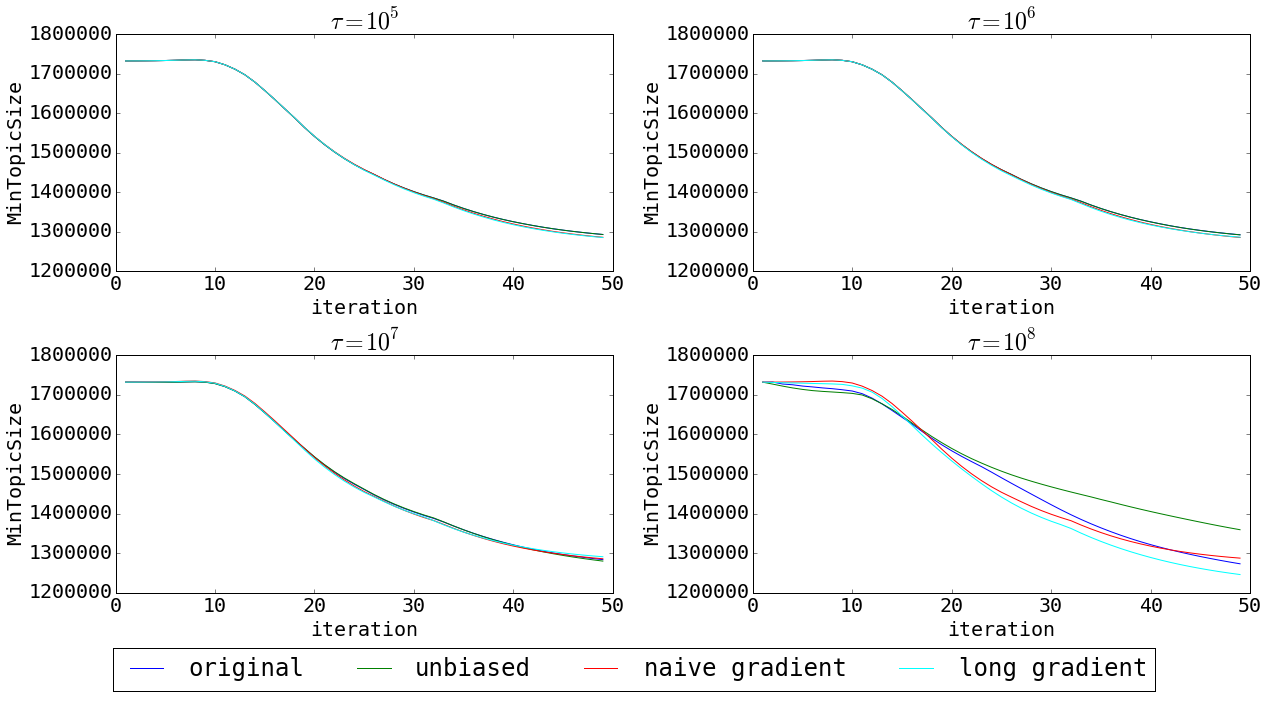

In [95]:
plot(3, 'MinTopicSize', 'upper right', 'iteration', 'MinTopicSize')

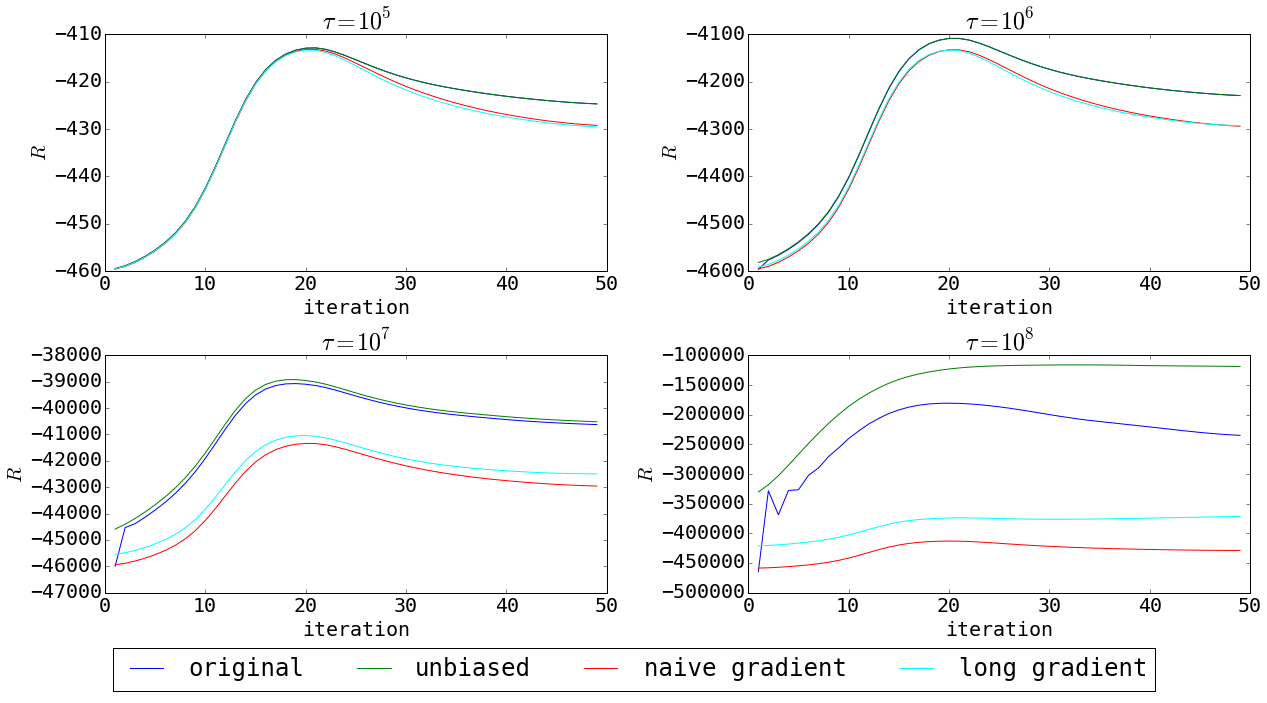

In [96]:
plot(3, 'R_values', 'lower right', 'iteration', '$R$')

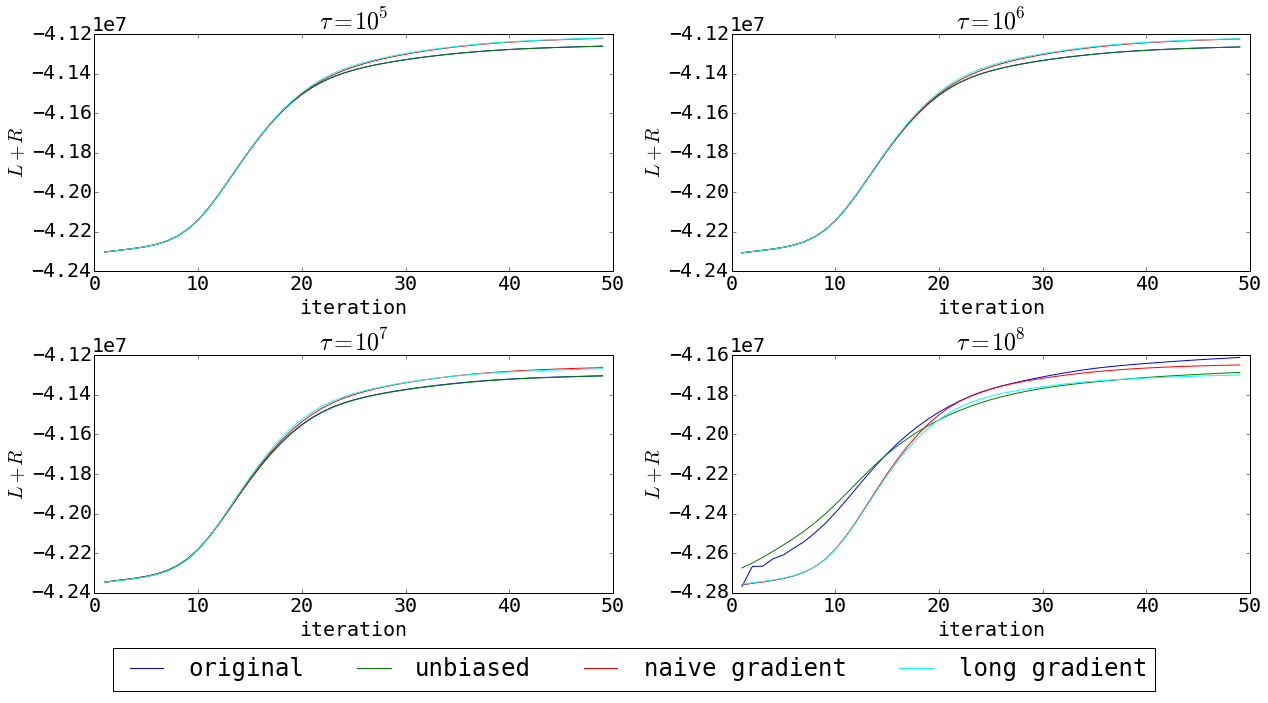

In [97]:
plot(3, 'LR_values', 'lower right', 'iteration', '$L + R$')

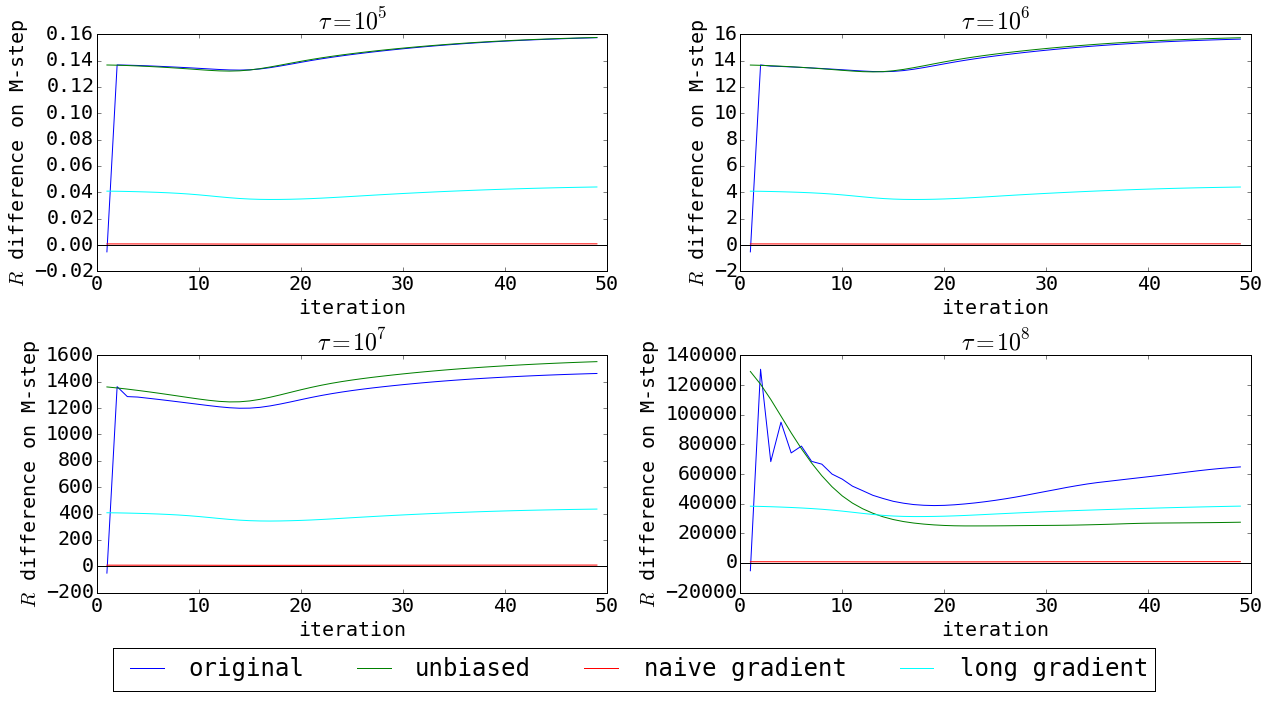

In [98]:
plot(3, 'RMstepDiff', 'upper right', 'iteration', '$R$ difference on M-step', zero_line=True)

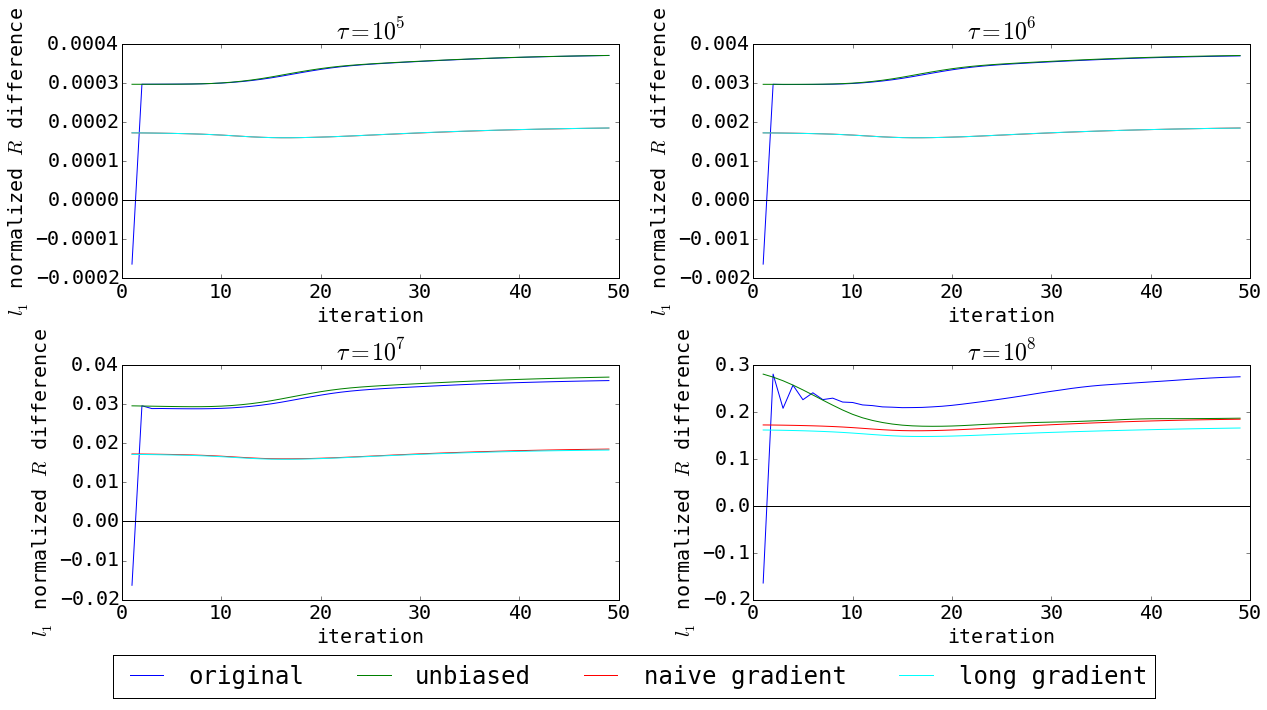

In [99]:
plot(3, 'RMstepDiffPerL1', 'best', 'iteration', '$l_1$ normalized $R$ difference', zero_line=True)

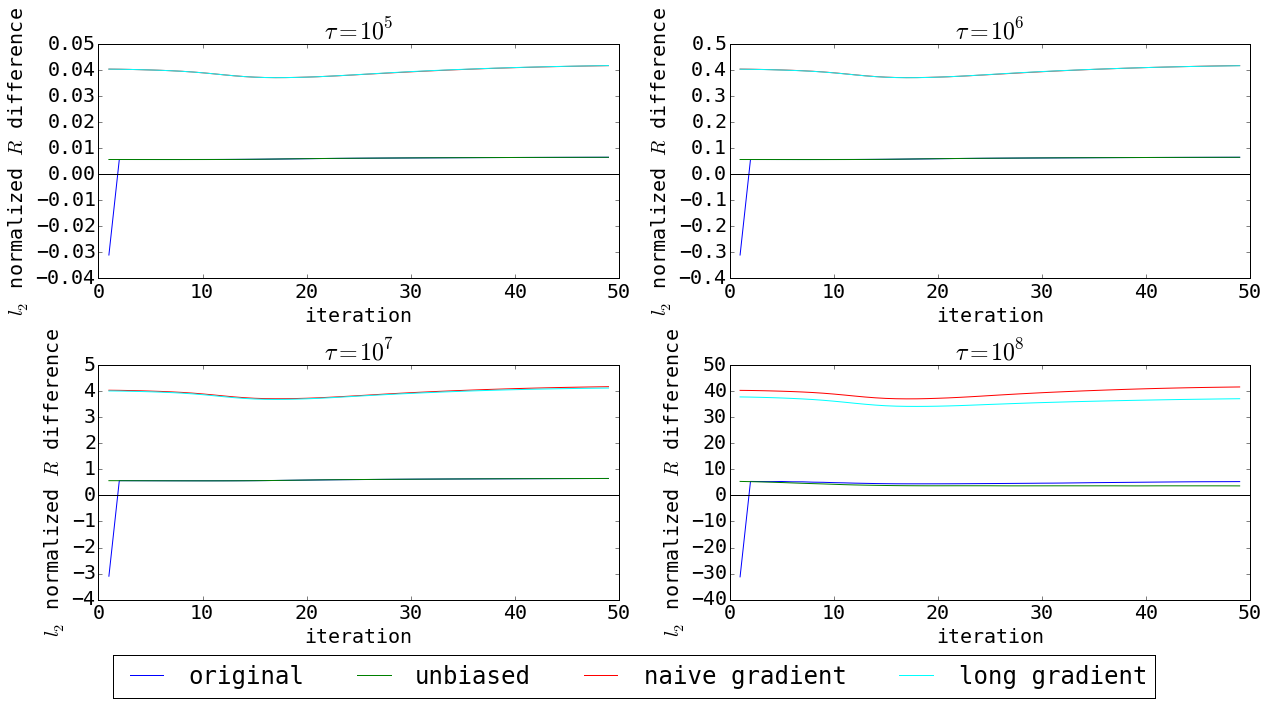

In [100]:
plot(3, 'RMstepDiffPerL2', 'best', 'iteration', '$l_2$ normalized $R$ difference', zero_line=True)

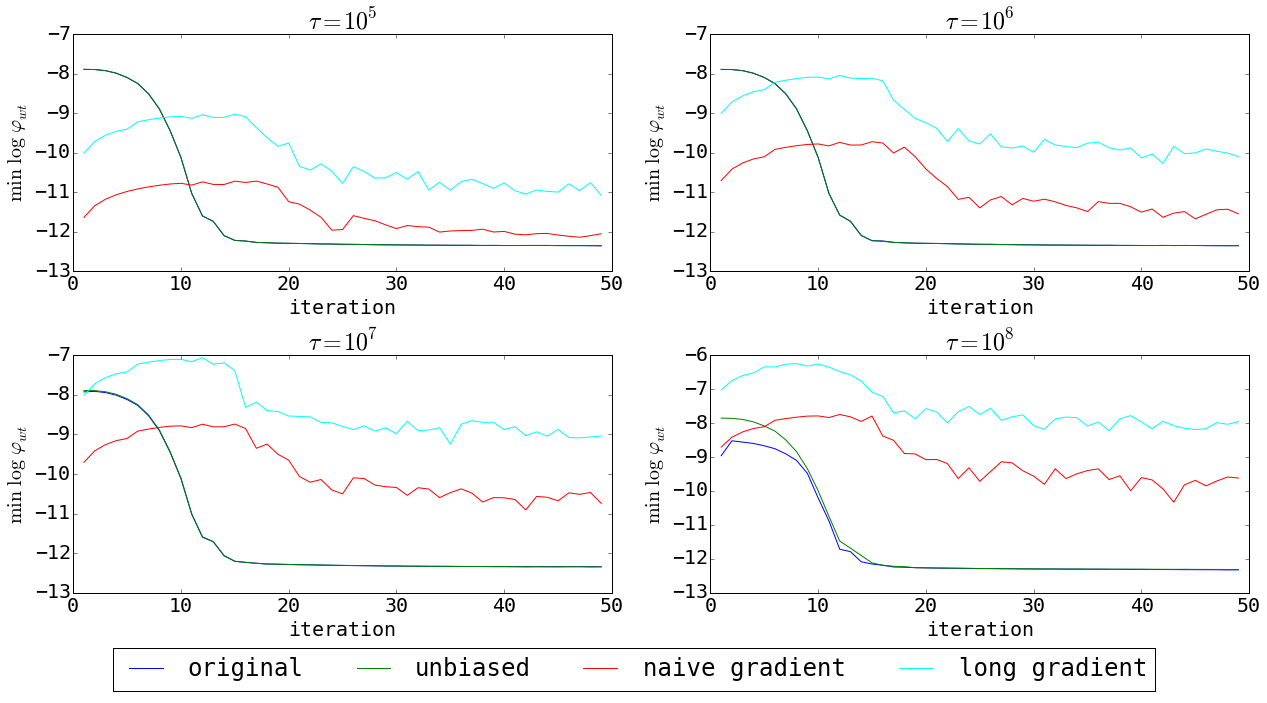

In [101]:
plot(3, 'minPhi_values', 'upper right', 'iteration', '$\\min\\ \\log\\ \\varphi_{wt}$')

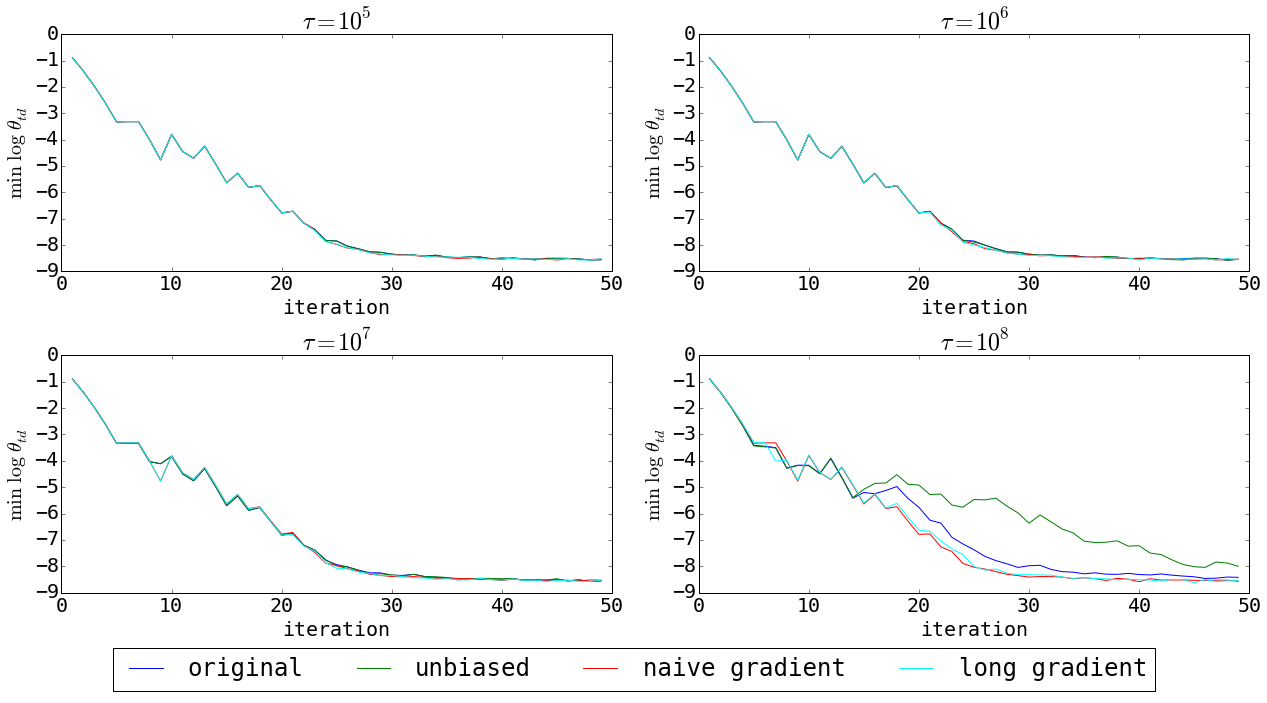

In [102]:
plot(3, 'minTheta_values', 'upper right', 'iteration', '$\\min\\ \\log\\ \\theta_{td}$')

In [20]:
font = {'family' : 'monospace',
        'size'   : 14}

matplotlib.rc('font', **font)
#matplotlib.rc('text', usetex=True)

#matplotlib.rcParams["text.latex.preamble"].append(r'\usepackage[dvips]{graphicx}\usepackage{xfrac}')

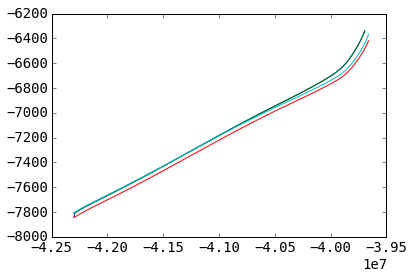

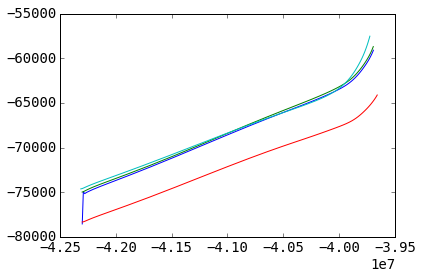

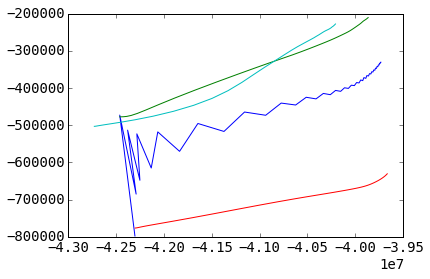

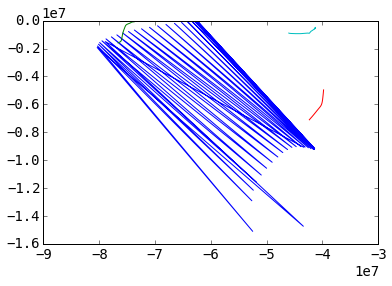

In [26]:
for tau in TAUS:
    for ttype in TYPES:
        L_values = [np.mean(x) for x in parse_log(TEMPLATE.format(topics=10, tau=tau, ttype=ttype), tau)['L_values']]
        R_values = [np.mean(x) for x in parse_log(TEMPLATE.format(topics=10, tau=tau, ttype=ttype), tau)['R_values']]
        plt.plot(L_values[1:], R_values[1:])
    plt.show()

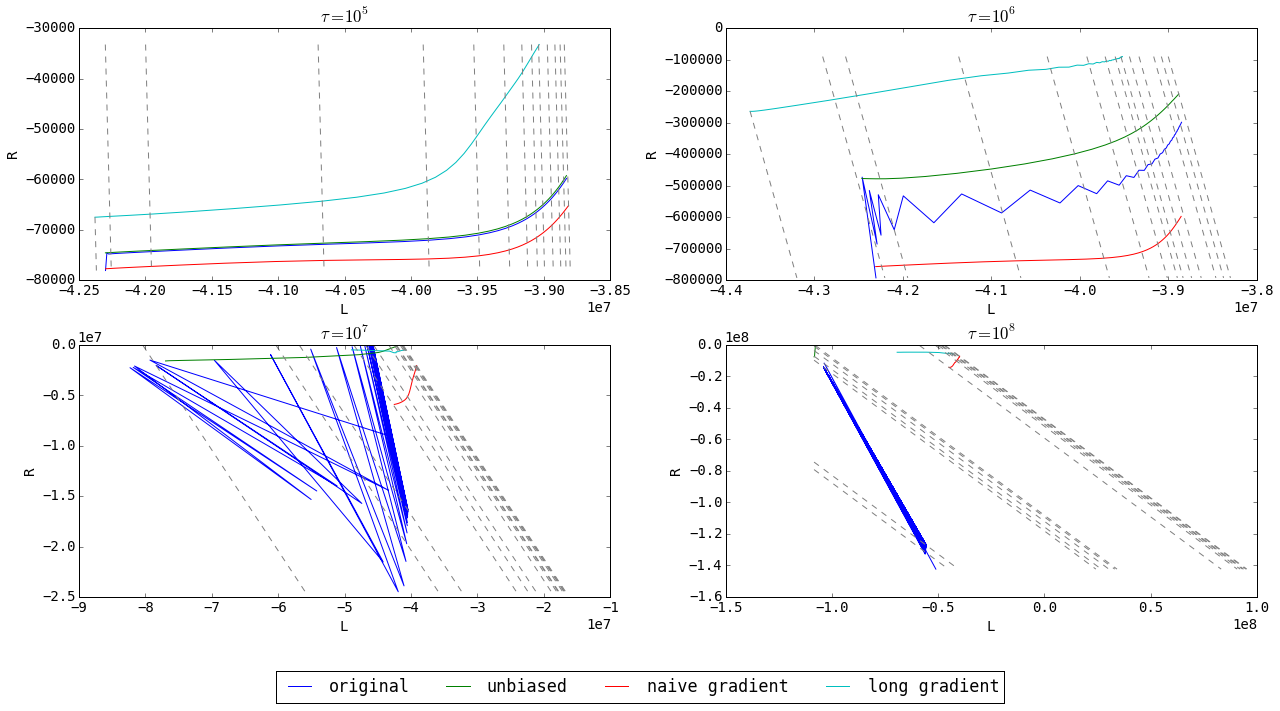

In [52]:
fig = plt.figure(figsize=(18, 10))
for i, tau in enumerate(TAUS):
    plt.subplot(2, 2, i + 1)
    plt.title('$\\tau = 10^{' + str(int(round(np.log(tau) / np.log(10)))) + '}$')
    lines = []
    level_values = []
    R_min, R_max = 1e10, -1e10
    L_min = 1e10
    for color, ttype in zip(COLORS, TYPES):
        L_values = [np.mean(x) for x in parse_log(TEMPLATE.format(topics=30, tau=tau, ttype=ttype), tau)['L_values']]
        R_values = [np.mean(x) for x in parse_log(TEMPLATE.format(topics=30, tau=tau, ttype=ttype), tau)['R_values']]
        R_min = min(R_min, min(R_values[1:]))
        R_max = max(R_max, max(R_values[1:]))
        L_min = min(L_min, min(L_values[1:]))
        level_values.extend([x + y for x, y in zip(L_values, R_values)])
        lines.extend(plt.plot(L_values[1:], R_values[1:]))
        plt.xlabel('L')
        plt.ylabel('R')
    for level in sorted(level_values)[::-15]:
        if level - L_min < R_max:
            plt.plot([L_min, level - R_min], [level - L_min, R_min], linestyle='--', color='grey')
        else:
            plt.plot([level - R_max, level - R_min], [R_max, R_min], linestyle='--', color='grey')

plt.tight_layout()
plt.subplots_adjust(bottom=.16)
lgd = plt.figlegend(lines, LEGEND, loc='lower center', ncol=4)

#plt.savefig('E:\\GitHub\\Diploma\\Presentation.Seminar\\presentation_pictures\\L_and_R_10.eps', format='eps', additional_artists=[lgd], bbox_inches="tight")
plt.show()